In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [34]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [35]:
if not os.path.isfile("data.csv"):
    !wget $data

In [36]:
!ls

 cal_housing_py3.pkz			 data.csv
'California Housing.ipynb'		 Untitled.ipynb
 car_price_prediction_regression.ipynb


In [37]:
# load data and preview
df = pd.read_csv("data.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [38]:
# make column consisted lower and underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [39]:
# the string columns are not consistent.
# find all string columns 

str_columns = df.dtypes[df.dtypes == 'object'].index 
for col in str_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    

In [40]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA

In [41]:
# lets check for kinds of values in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [42]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [43]:
for col in df.columns:
    print(col)
    print("Nunique: ", df[col].nunique())
    print("Some Unique values: ", df[col].unique()[:5])
    print("Missing count: ", df[col].isnull().sum())
    print("---" * 30)

make
Nunique:  48
Some Unique values:  ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Missing count:  0
------------------------------------------------------------------------------------------
model
Nunique:  914
Some Unique values:  ['1_series_m' '1_series' '100' '124_spider' '190-class']
Missing count:  0
------------------------------------------------------------------------------------------
year
Nunique:  28
Some Unique values:  [2011 2012 2013 1992 1993]
Missing count:  0
------------------------------------------------------------------------------------------
engine_fuel_type
Nunique:  10
Some Unique values:  ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Missing count:  3
------------------------------------------------------------------------------------------
engine_hp
Nunique:  356
Some Unique values:  [335. 300. 230. 320. 172.]
Missing count:  69
-------------------------------------------------

<AxesSubplot:xlabel='msrp', ylabel='Count'>

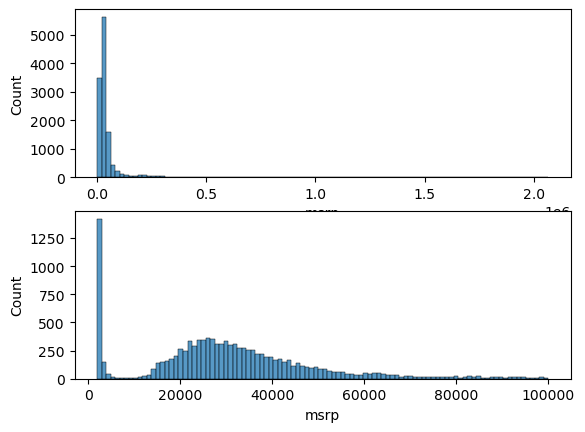

In [44]:
# price distribution
fig, (ax1, ax2) = plt.subplots(2,1)
sns.histplot(df.msrp, bins=100, ax=ax1)
sns.histplot(df[df.msrp < 100000].msrp, bins=100, ax=ax2)

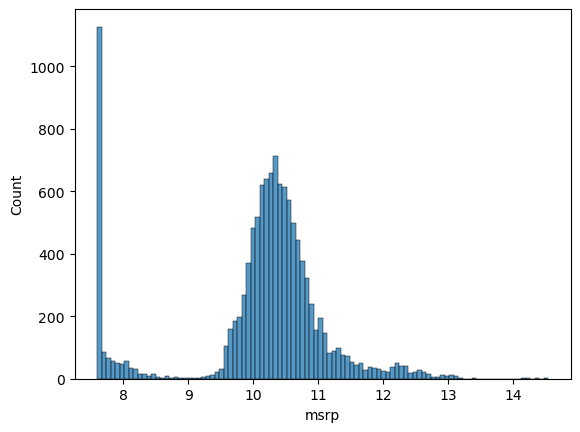

In [45]:
# log of price distribution
sns.histplot(np.log1p(df.msrp), bins=100);

## Testing, Validation and Training Dataset

In [46]:
# feature egineering
df["age"] = df.year.max() -df.year
df.age.unique()

array([ 6,  5,  4, 25, 24, 23,  0, 26,  1, 27,  2, 21, 20, 19,  3, 18, 15,
       14, 13, 22, 10,  9,  8, 16,  7, 17, 12, 11])

### Randomizing the dataset

In [47]:
# randomize dataset
idx = np.arange(df.shape[0]) #create list of 0 - n-1

np.random.seed(2) # to always get same randomness
np.random.shuffle(idx) # shuffle list


df = df.iloc[idx]
df.reset_index(drop=True, inplace=True)

### Normalizing the target variable

In [48]:
# take log to normalize target variable
df["msrp"] = np.log1p(df["msrp"])

In [49]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,age
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9.575747,9
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,9.887663,5
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,9.893235,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,7.601402,26
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,10.937757,0


### Encoding catgorical variables

In [50]:
categories = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels']

df_copy = df.copy()
special_cols = []

for category in categories:
    top_ten_val = df_copy[category].value_counts().index[:5]
    for val in top_ten_val:
        df_copy["%s_%s" % (category, val)] = (df_copy[category] == val).astype('int')
        special_cols.append("%s_%s" % (category, val))

### Splitting dataset

In [51]:
#data sizes
test_size = int(df_copy.shape[0] * 0.2)
val_size = int(df_copy.shape[0] * 0.2)
train_size = df_copy.shape[0] - test_size - val_size

# test_data
X_test = df_copy[:test_size]

#val_data
X_val = df_copy[test_size:test_size+train_size]

#training_data
X_train = df_copy[test_size+train_size:]

# confirmation
print(df_copy.shape, (X_test.shape[0] + X_val.shape[0] + X_train.shape[0]))

(11914, 36) 11914


### Feature variables 

In [52]:
cols = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity', 'age'] + special_cols

In [53]:
# extract target variables for each
y_test = X_test.msrp
del X_test["msrp"]
print("y_test: ", y_test.values)
X_test = X_test[cols].fillna(0).values


# extract target variables for each
y_val = X_val.msrp
del X_val["msrp"]
print("y_val: ", y_val.values)
X_val = X_val[cols].fillna(0).values

# extract target variables for each
y_train = X_train.msrp
del X_train["msrp"]
print("y_train: ", y_train.values)
X_train = X_train[cols].fillna(0).values

y_test:  [ 9.57574708  9.887663    9.89323518 ...  9.97399261 10.92595647
 10.13701698]
y_val:  [ 9.85224689  9.58190393 11.62626308 ... 11.21756062  9.77542688
 10.1924563 ]
y_train:  [ 7.60140233  8.07464908 10.34563811 ... 10.27852782 10.00789261
 10.40414162]


In [54]:
def train_linear_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    XTX = X.T.dot(X)
    
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    weights = XTX_inv.dot(X.T).dot(y)

    return weights[0], weights[1:]

w0, w = train_linear_reg(X_train, y_train, r=0.01)

In [55]:
X_train.dtype

dtype('float64')

<AxesSubplot:xlabel='msrp', ylabel='Count'>

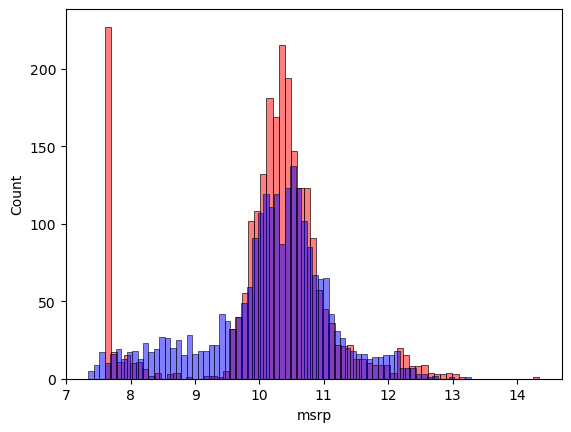

In [56]:
y_pred = w0 + X_train.dot(w)
sns.histplot(y_train, bins=70, color='red', alpha=0.5)
sns.histplot(y_pred, bins=70, color='blue', alpha=0.5)

## RMSE

In [57]:
def rmse(y, y_pred):
    se = (y-y_pred) ** 2
    return np.sqrt(se.mean())

In [58]:
rmse(y_train, y_pred)

0.45579754135175377

## Validation 

In [59]:
y_pred = w0+X_val.dot(w)
rmse(y_val, y_pred)

0.47897052364526965

## Using the model

In [60]:
sample = df.sample(1)
sample

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,age
2070,chevrolet,s-10_blazer,1993,regular_unleaded,165.0,6.0,manual,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,22,16,1385,7.601402,24


In [61]:
# typically using the model will come through a json request
request_from_app = sample.to_dict('records')[0]
request_from_app

{'make': 'chevrolet',
 'model': 's-10_blazer',
 'year': 1993,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 165.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'manual',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'midsize',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 22,
 'city_mpg': 16,
 'popularity': 1385,
 'msrp': 7.601402334583733,
 'age': 24}

### Prepare the request

In [62]:
request_df = pd.DataFrame([request_from_app])
request_df.fillna(0, inplace=True)

In [63]:

for category in categories:
    top_ten_val = df_copy[category].value_counts().index[:5]
    for val in top_ten_val:
        request_df["%s_%s" % (category, val)] = (request_df[category] == val).astype('int')

request_df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,...,engine_fuel_type_diesel,transmission_type_automatic,transmission_type_manual,transmission_type_automated_manual,transmission_type_direct_drive,transmission_type_unknown,driven_wheels_front_wheel_drive,driven_wheels_rear_wheel_drive,driven_wheels_all_wheel_drive,driven_wheels_four_wheel_drive
0,chevrolet,s-10_blazer,1993,regular_unleaded,165.0,6.0,manual,rear_wheel_drive,4.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [64]:
pred = w0 + request_df[cols].dot(w)
pred, request_from_app['msrp']



(0    8.007017
 dtype: float64,
 7.601402334583733)